## Data uploader and imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_id = "1rVYGtWzw9s9Bw80-XaIN8gYBsBG79K8B" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html


from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!unzip {fileId['title']}

newwidsdatathon2025.zip
Archive:  newwidsdatathon2025.zip
  inflating: Data Dictionary.xlsx    
  inflating: SAMPLE_SUBMISSION.xlsx  
  inflating: TEST/TEST_CATEGORICAL.xlsx  
  inflating: TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TEST/TEST_QUANTITATIVE_METADATA.xlsx  
  inflating: TRAIN_NEW/TRAINING_SOLUTIONS.xlsx  
  inflating: TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx  
  inflating: TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv  
  inflating: TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx  
  inflating: TRAIN_OLD/TRAINING_SOLUTIONS.xlsx  
  inflating: TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx  
  inflating: TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx  


https://drive.google.com/file/d/1VpSCc_ms2dj59bMAAOqCu0OI0jjb-8Hq/view?usp=sharing

## Data Exploration

Imported two datasets - train_quantitative and train_answers. Both datasets are loaded permanently into the folder in this colab (to see how to do it, check [this stackoverflow post](https://stackoverflow.com/questions/50426015/how-to-upload-data-permanently-on-google-colaboratory). Checked out their formats and plotted the distribution of the data.

In [ ]:
train_quantitative = pd.read_excel('TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx')

In [ ]:
train_answers = pd.read_excel('TRAIN_NEW/TRAINING_SOLUTIONS.xlsx')

In [ ]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


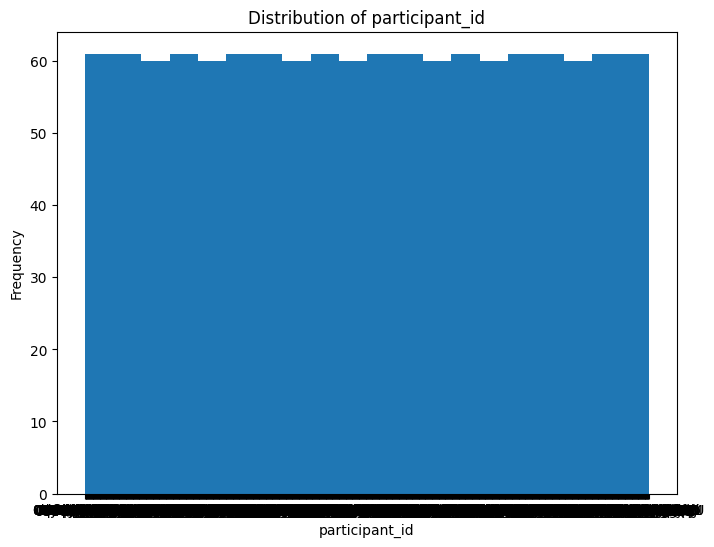

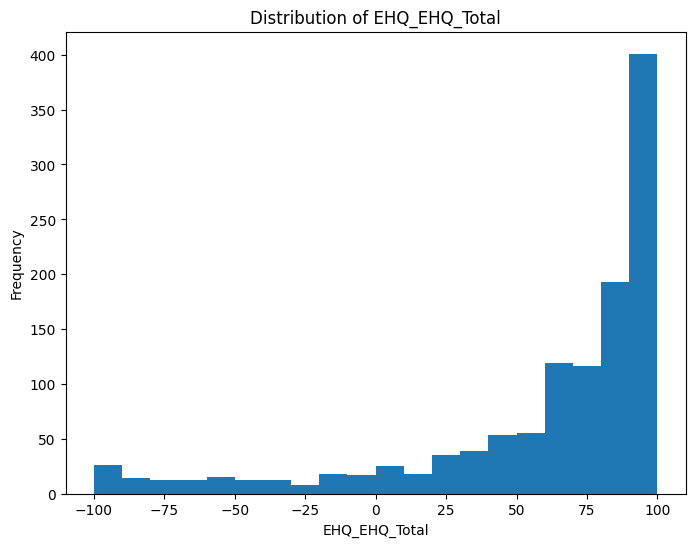

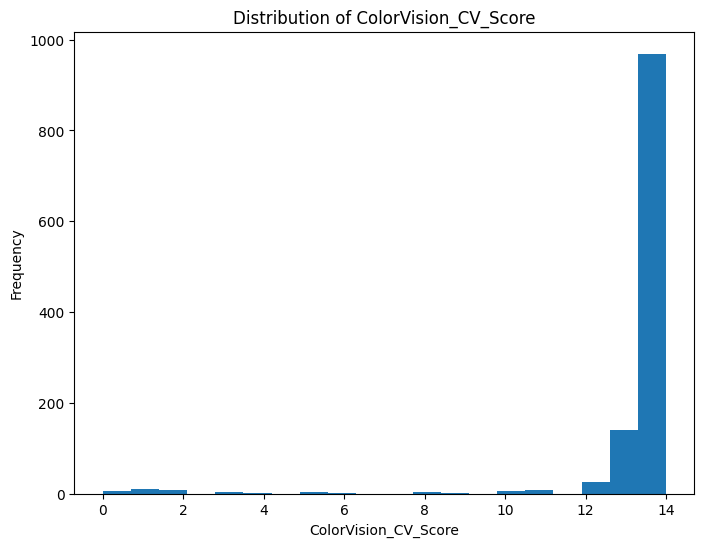

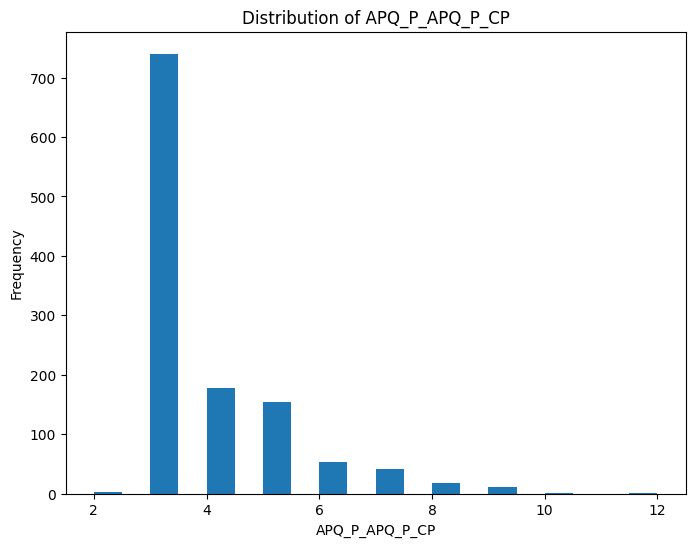

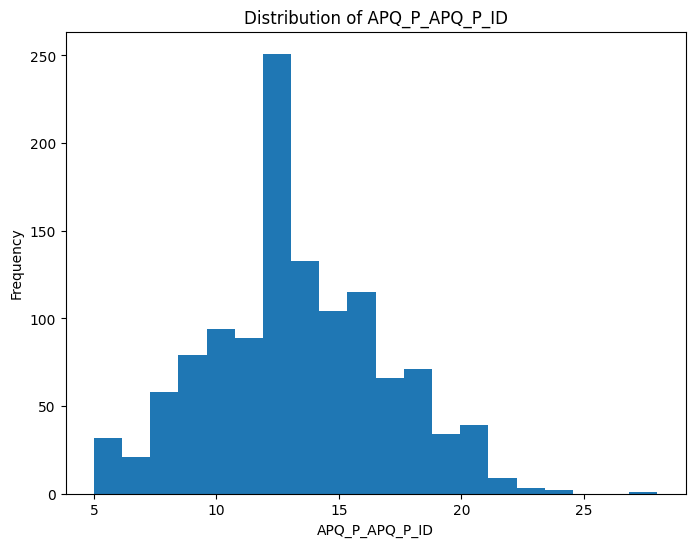

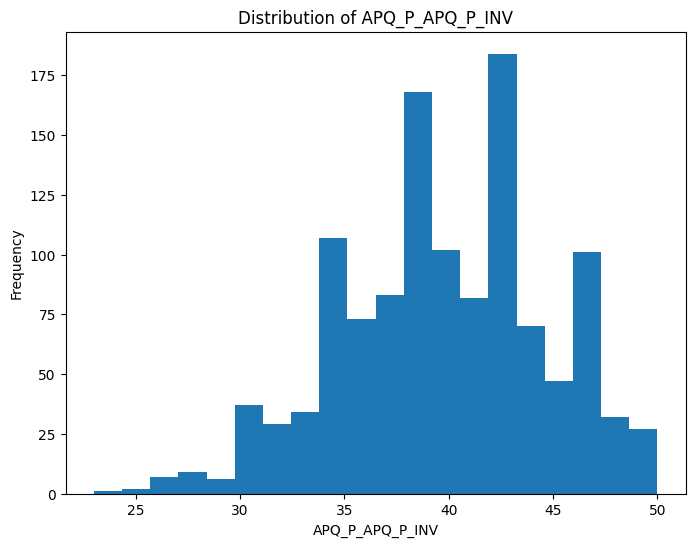

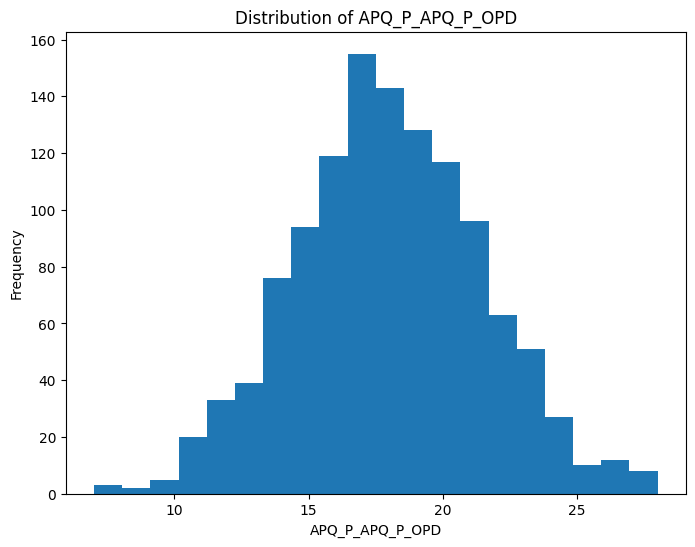

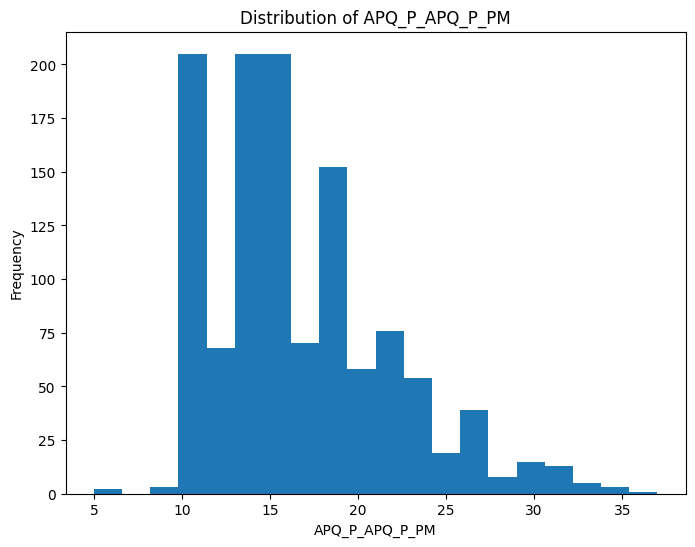

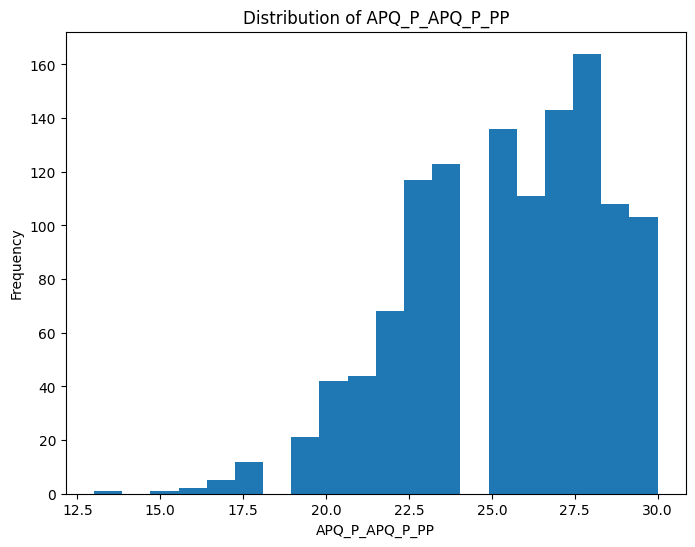

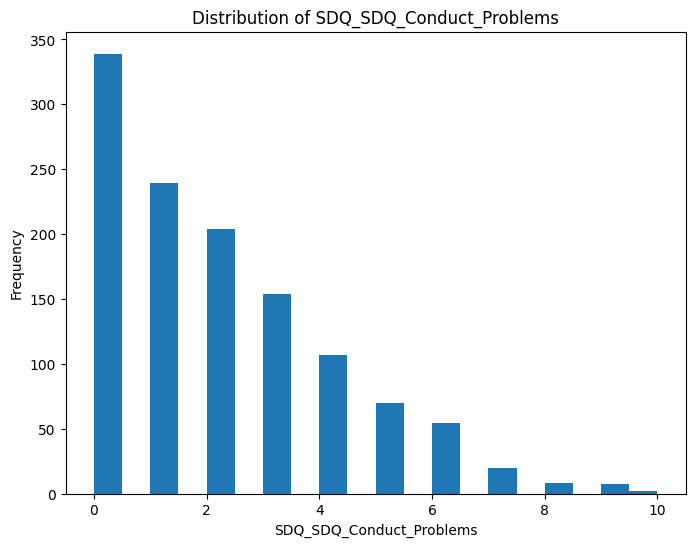

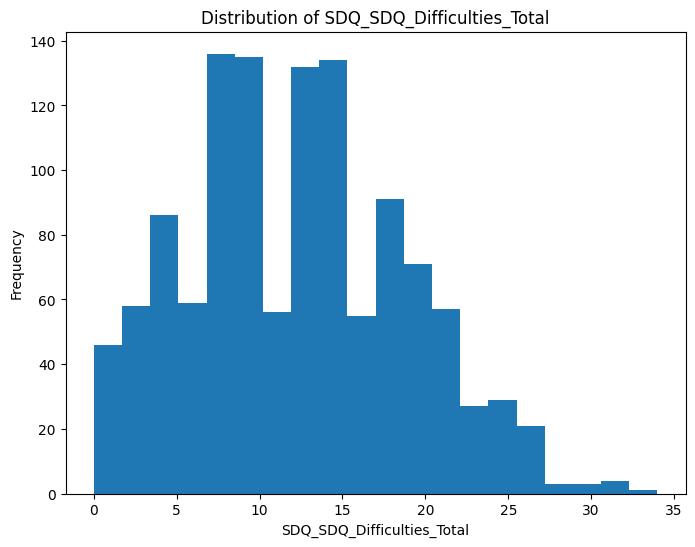

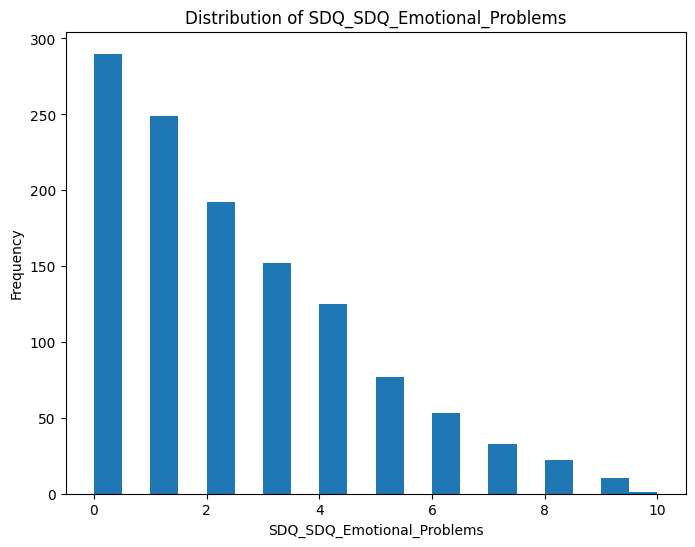

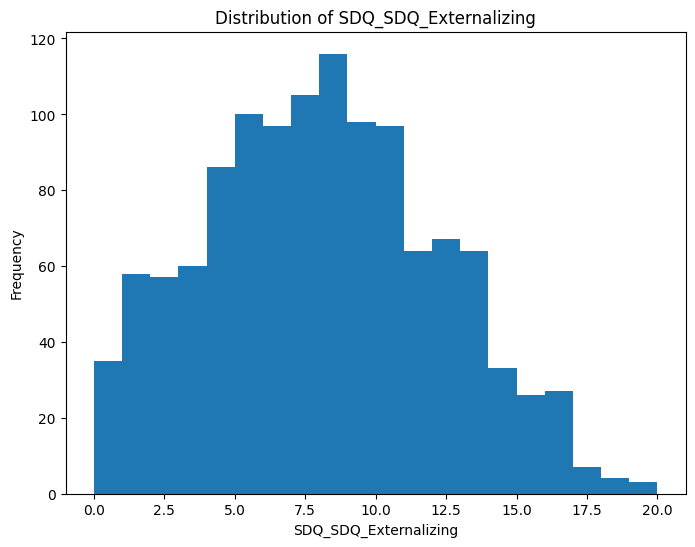

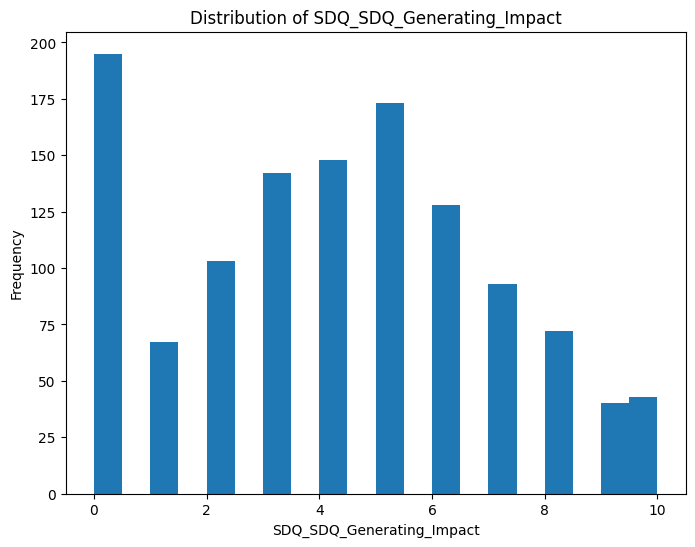

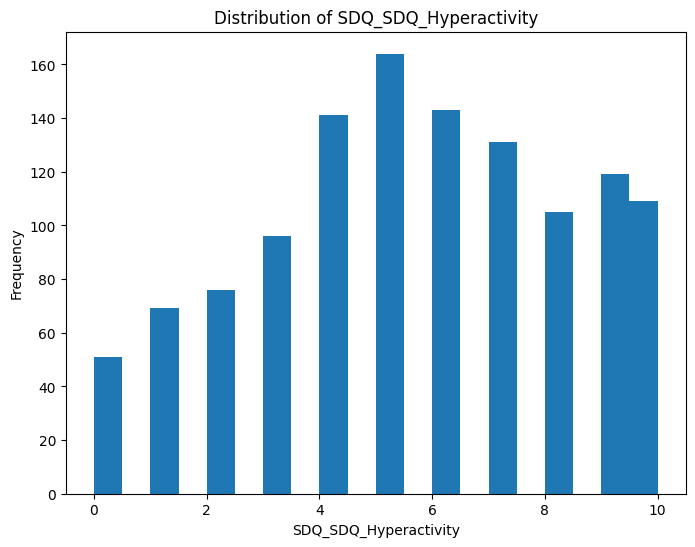

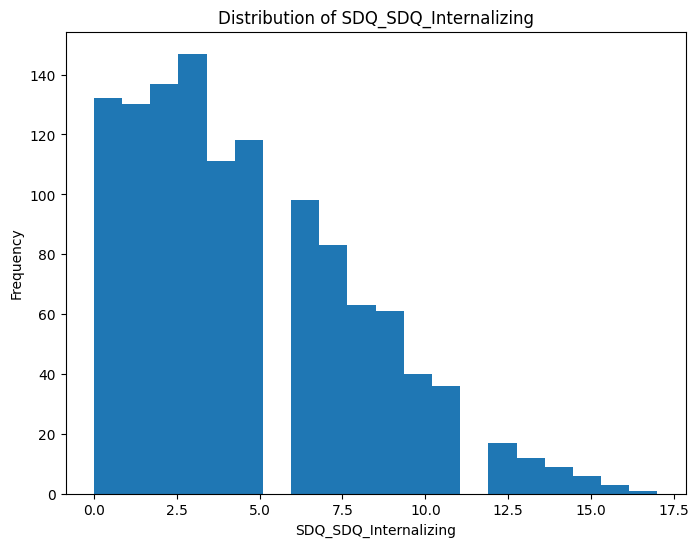

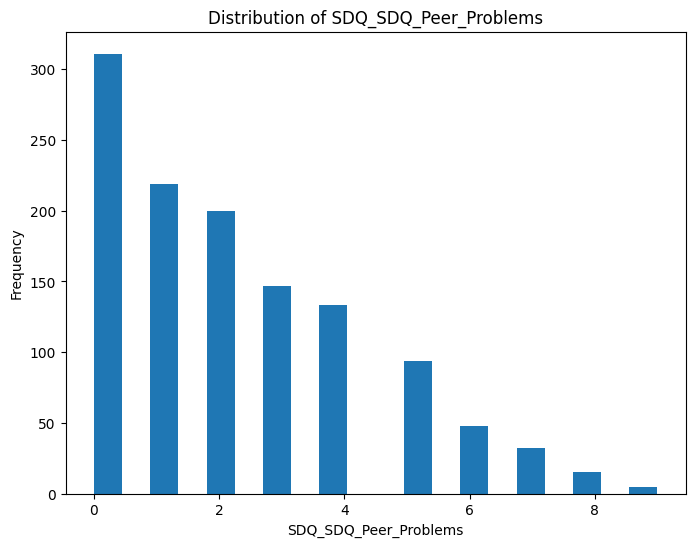

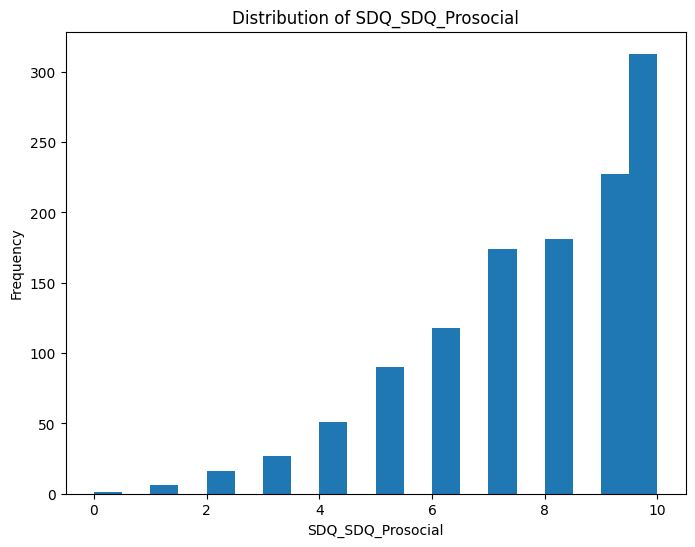

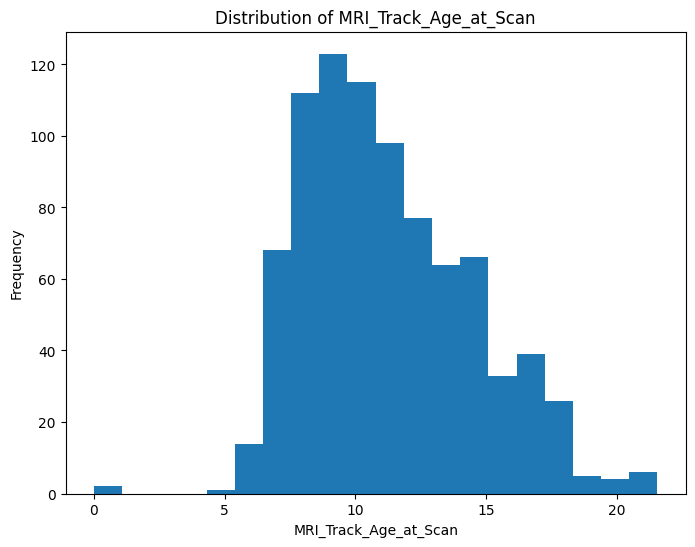

In [ ]:
import matplotlib.pyplot as plt

# Loop through each column in the dataframe
for column in train_quantitative.columns:
      plt.figure(figsize=(8, 6))
      plt.hist(train_quantitative[column], bins=20)
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.show()


In [ ]:
train_quantitative.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

<h3> Confirming no missing values </h3>

In [ ]:
train_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,13
ColorVision_CV_Score,23
APQ_P_APQ_P_CP,12
APQ_P_APQ_P_ID,12
APQ_P_APQ_P_INV,12
APQ_P_APQ_P_OPD,12
APQ_P_APQ_P_PM,12
APQ_P_APQ_P_PP,12
SDQ_SDQ_Conduct_Problems,9


In [ ]:
train_quantitative.shape

(1213, 19)

<h3> Removing null values deletes like 40% of the data, will not use this

In [ ]:
train_quantitative_cleaned = train_quantitative.dropna()
train_quantitative_cleaned.isna().sum()
train_quantitative_cleaned.shape

(812, 19)

<h3> Replace missing values in each column with the mean

In [ ]:
numeric_columns = train_quantitative.select_dtypes(include=['number'])
train_quantitative[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

In [ ]:
train_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


In [ ]:
train_answers.isna().sum()

,0
participant_id,0
ADHD_Outcome,0
Sex_F,0


In [ ]:
train_answers.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


**note: still twice as much men with adhd as women without

## Model Set 1: Initial Models

Decision Trees, Gradient Boosted Classifiers, and Logistic Regressors are explored. Strategies such as grid search are utilized.

**Sex_F Model Selection**

In [ ]:

# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')
# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']
# Import necessary libraries for model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # 5-fold cross-validation
    results[name] = {
        'mean_accuracy': np.mean(cv_scores),
        'std_accuracy': np.std(cv_scores)
    }

# Print the results
for name, result in results.items():
    print(f'{name}: Mean Accuracy = {result["mean_accuracy"]:.4f}, Std Dev = {result["std_accuracy"]:.4f}')

# Select the best-performing model based on mean accuracy
best_model_name = max(results, key=lambda k: results[k]['mean_accuracy'])
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'\nBest Model: {best_model_name}')
print(f'Test Accuracy: {accuracy:.4f}')



Logistic Regression: Mean Accuracy = 0.6588, Std Dev = 0.0072
Decision Tree: Mean Accuracy = 0.5619, Std Dev = 0.0216
Gradient Boosting: Mean Accuracy = 0.6062, Std Dev = 0.0082

Best Model: Logistic Regression
Test Accuracy: 0.7284


**ADHD_Outcome Model Selection**

In [ ]:

# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')
# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # 5-fold cross-validation
    results[name] = {
        'mean_accuracy': np.mean(cv_scores),
        'std_accuracy': np.std(cv_scores)
    }

# Print the results
for name, result in results.items():
    print(f'{name}: Mean Accuracy = {result["mean_accuracy"]:.4f}, Std Dev = {result["std_accuracy"]:.4f}')

# Select the best-performing model based on mean accuracy
best_model_name = max(results, key=lambda k: results[k]['mean_accuracy'])
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'\nBest Model: {best_model_name}')
print(f'Test Accuracy: {accuracy:.4f}')

# Try making predictions on training set to evaluate under/overfit
y_pred_training = best_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_training)
print(f'Training Accuracy: {training_accuracy:.4f}')



Logistic Regression: Mean Accuracy = 0.7876, Std Dev = 0.0082
Decision Tree: Mean Accuracy = 0.7021, Std Dev = 0.0175
Gradient Boosting: Mean Accuracy = 0.7619, Std Dev = 0.0216

Best Model: Logistic Regression
Test Accuracy: 0.8066
Training Accuracy: 0.8062


**Guys logistic regression is kinda goated at ADHD prediction??** ~~~~~

<h1> Model Training and Selection </h1>

<h2> Plain Decision Trees </h2>
overfitting like wild

**Sex_F Prediction**

In [ ]:
# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')


Decision Tree Accuracy: 0.5802
Decision Tree Training Accuracy: 1.0000


**ADHD_Outcome Prediction**

In [ ]:
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')


Decision Tree Accuracy: 0.6667
Decision Tree Training Accuracy: 1.0000


<h2> Gradient Boosted Decision Trees </h2>

**ADHD_Outcome Prediction**

In [ ]:
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, gb_classifier.predict(X_train))
print(f'Gradient Boosting Training Accuracy: {train_accurac:.4f}')


Gradient Boosting Accuracy: 0.7942
Gradient Boosting Training Accuracy: 0.8887


<h2> Grid Search GB DTs </h2>

**ADHD_Outcome**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_adhd_model = grid_search.best_estimator_
y_pred = best_adhd_model.predict(X_train)
print(f"Validation accuracy: {accuracy_score(y_train, y_pred)}")
y_pred = best_adhd_model.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.8577319587628865
Test accuracy: 0.7860082304526749


**Sex_F Prediction**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_female_model = grid_search.best_estimator_
y_pred = best_female_model.predict(X_train)
print(f"Validation accuracy: {accuracy_score(y_train, y_pred)}")
y_pred = best_female_model.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.8865979381443299
Test accuracy: 0.7119341563786008


## Model Set 2: Optuna Fine-Tuning

Performance hovers around 0.72 accuracy. Also attempted optimizing on F1 score with 2x weight on Female ADHD examples, resulting in 0.8 and 0.5 F1 on ADHD and sex predictions, respectively.

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


**ADHD**

In [ ]:
# most code from geeks for geeks
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# this code is taken from above ################
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
###################################################

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
    }

    gb_model = GradientBoostingClassifier(**param_space, validation_fraction=0.1, n_iter_no_change=5, random_state=42)

    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return 1.0 - accuracy

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
best_model_optuna = GradientBoostingClassifier(**best_params_optuna, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
best_model_optuna.fit(X_train, y_train)

y_pred_best_optuna = best_model_optuna.predict(X_test)

accuracy_best_optuna = accuracy_score(y_test, y_pred_best_optuna)

print(f"Best Model Accuracy (Optuna): {accuracy_best_optuna}")


[I 2025-02-22 19:01:58,857] A new study created in memory with name: no-name-dbe77d7c-366f-430a-b49f-751b6750ad27
[I 2025-02-22 19:02:01,093] Trial 0 finished with value: 0.2304526748971193 and parameters: {'n_estimators': 200, 'learning_rate': 0.02342261410642195, 'max_depth': 6}. Best is trial 0 with value: 0.2304526748971193.
[I 2025-02-22 19:02:01,770] Trial 1 finished with value: 0.2592592592592593 and parameters: {'n_estimators': 150, 'learning_rate': 0.05474337414256585, 'max_depth': 7}. Best is trial 0 with value: 0.2304526748971193.
[I 2025-02-22 19:02:02,128] Trial 2 finished with value: 0.23868312757201648 and parameters: {'n_estimators': 250, 'learning_rate': 0.15547031169924483, 'max_depth': 4}. Best is trial 0 with value: 0.2304526748971193.
[I 2025-02-22 19:02:05,216] Trial 3 finished with value: 0.2510288065843621 and parameters: {'n_estimators': 200, 'learning_rate': 0.014941930423102663, 'max_depth': 7}. Best is trial 0 with value: 0.2304526748971193.
[I 2025-02-22 19

Best Model Accuracy (Optuna): 0.7901234567901234


**Sex_F**

In [ ]:
# most code from geeks for geeks
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# this code is taken from above ################
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)
###################################################

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
    }

    gb_model = GradientBoostingClassifier(**param_space, validation_fraction=0.1, n_iter_no_change=5, random_state=42)

    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return 1.0 - accuracy

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
best_model_optuna = GradientBoostingClassifier(**best_params_optuna, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
best_model_optuna.fit(X_train, y_train)

y_pred_best_optuna = best_model_optuna.predict(X_test)

accuracy_best_optuna = accuracy_score(y_test, y_pred_best_optuna)

print(f"Best Model Accuracy (Optuna): {accuracy_best_optuna}")


[I 2025-02-22 18:58:40,248] A new study created in memory with name: no-name-0baadd43-e8f0-4432-99b7-638cbd0f5162
[I 2025-02-22 18:58:40,396] Trial 0 finished with value: 0.2880658436213992 and parameters: {'n_estimators': 150, 'learning_rate': 0.053270920378659346, 'max_depth': 3}. Best is trial 0 with value: 0.2880658436213992.
[I 2025-02-22 18:58:40,875] Trial 1 finished with value: 0.2962962962962963 and parameters: {'n_estimators': 50, 'learning_rate': 0.092242320408569, 'max_depth': 6}. Best is trial 0 with value: 0.2880658436213992.
[I 2025-02-22 18:58:41,223] Trial 2 finished with value: 0.3004115226337448 and parameters: {'n_estimators': 250, 'learning_rate': 0.07322007053579085, 'max_depth': 6}. Best is trial 0 with value: 0.2880658436213992.
[I 2025-02-22 18:58:41,503] Trial 3 finished with value: 0.279835390946502 and parameters: {'n_estimators': 150, 'learning_rate': 0.03547025877387762, 'max_depth': 5}. Best is trial 3 with value: 0.279835390946502.
[I 2025-02-22 18:58:41

Best Model Accuracy (Optuna): 0.7448559670781894


Making models based on best parameters

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
#ADHD
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# this code is taken from above ################
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)
###################################################

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
    }

    gb_model = GradientBoostingClassifier(**param_space, validation_fraction=0.1, n_iter_no_change=5, random_state=42)

    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return 1.0 - accuracy

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
best_model_optuna = GradientBoostingClassifier(**best_params_optuna, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
best_model_optuna.fit(X_train, y_train)

y_pred_best_optuna = best_model_optuna.predict(X_test)

accuracy_best_optuna = accuracy_score(y_test, y_pred_best_optuna)

print(f"Best Model Accuracy (Optuna): {accuracy_best_optuna}")



[I 2025-03-06 21:08:54,941] A new study created in memory with name: no-name-17897c8f-defd-43f9-998e-8a3d9edff317
[I 2025-03-06 21:08:55,052] Trial 0 finished with value: 0.32098765432098764 and parameters: {'n_estimators': 250, 'learning_rate': 0.1064132658276718, 'max_depth': 6}. Best is trial 0 with value: 0.32098765432098764.
[I 2025-03-06 21:08:55,161] Trial 1 finished with value: 0.30452674897119336 and parameters: {'n_estimators': 100, 'learning_rate': 0.07883124929623248, 'max_depth': 7}. Best is trial 1 with value: 0.30452674897119336.
[I 2025-03-06 21:08:55,243] Trial 2 finished with value: 0.308641975308642 and parameters: {'n_estimators': 150, 'learning_rate': 0.18862022831727554, 'max_depth': 5}. Best is trial 1 with value: 0.30452674897119336.
[I 2025-03-06 21:08:55,331] Trial 3 finished with value: 0.3004115226337448 and parameters: {'n_estimators': 150, 'learning_rate': 0.12401832667131461, 'max_depth': 6}. Best is trial 3 with value: 0.3004115226337448.
[I 2025-03-06 2

Best Model Accuracy (Optuna): 0.7242798353909465


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model with class weights
logistic_model = LogisticRegression(
    class_weight={0: 1, 1: 2},  # Double the weight for ADHD cases
    solver='liblinear',
    max_iter=1000
)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate using F1 score
test_f1 = f1_score(y_test, y_pred)
print(f'Test F1 Score of Logistic Regression (ADHD): {test_f1:.4f}')

# Evaluate on the training set to check for underfitting/overfitting
y_train_pred = logistic_model.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
print(f'Training F1 Score of Logistic Regression (ADHD): {train_f1:.4f}')


Test F1 Score of Logistic Regression (ADHD): 0.8564
Training F1 Score of Logistic Regression (ADHD): 0.8696


In [ ]:
# Separate features and target
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model with class weights
logistic_model = LogisticRegression(
    class_weight={0: 1, 1: 2},  # Double weight for females
    solver='liblinear',
    max_iter=1000
)
logistic_model.fit(X_train, y_train)

# Cross-validation using F1 score
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='f1')
mean_f1 = np.mean(cv_scores)
std_f1 = np.std(cv_scores)
print(f'Logistic Regression: Mean F1 = {mean_f1:.4f}, Std Dev = {std_f1:.4f}')

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate using F1 score
test_f1 = f1_score(y_test, y_pred)
print(f'Test F1 Score (Sex_F): {test_f1:.4f}')

# Check performance on the training set
y_train_pred = logistic_model.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
print(f'Training F1 Score (Sex_F): {train_f1:.4f}')


Logistic Regression: Mean F1 = 0.5196, Std Dev = 0.0288
Test F1 Score (Sex_F): 0.5346
Training F1 Score (Sex_F): 0.5389


## Miscell: Sex_F Prediction Further Work

Continued trying to optimize for sex prediction. Unsuccessful - best bet is going straight 1's.

In [ ]:
# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets (stratify to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(
    learning_rate=0.05,  # Learning rate controls step size (lower = more stable)
    n_estimators=200,     # Number of boosting stages (more = higher complexity)
    max_depth=3,          # Limits tree depth to avoid overfitting
    subsample=0.8,        # Fraction of samples to use for training
    random_state=42
)

# Cross-validation using F1 score
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='f1')
mean_f1 = np.mean(cv_scores)
std_f1 = np.std(cv_scores)
print(f'Gradient Boosting: Mean F1 = {mean_f1:.4f}, Std Dev = {std_f1:.4f}')

# Train model on the training set
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Evaluate using F1 score
test_f1 = f1_score(y_test, y_pred)
print(f'Test F1 Score (Sex_F): {test_f1:.4f}')

# Evaluate on training set for overfitting
y_train_pred = gbc.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
print(f'Training F1 Score (Sex_F): {train_f1:.4f}')


Gradient Boosting: Mean F1 = 0.2981, Std Dev = 0.0529
Test F1 Score (Sex_F): 0.4286
Training F1 Score (Sex_F): 0.6855


<h1> Submission to Kaggle </h1>
<h2> Data Preparation </h2>
Check for missing values in the test dataset

In [ ]:
test_quantitative = pd.read_excel('TEST/TEST_QUANTITATIVE_METADATA.xlsx')

In [ ]:
test_quantitative.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [ ]:
train_quantitative.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [ ]:
test_quantitative.shape

(304, 19)

In [ ]:
test_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,1
ColorVision_CV_Score,9
APQ_P_APQ_P_CP,15
APQ_P_APQ_P_ID,15
APQ_P_APQ_P_INV,15
APQ_P_APQ_P_OPD,15
APQ_P_APQ_P_PM,15
APQ_P_APQ_P_PP,15
SDQ_SDQ_Conduct_Problems,30


In [ ]:
numeric_columns = test_quantitative.select_dtypes(include=['number'])
test_quantitative[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

In [ ]:
test_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


<h3> Filling in missing values </h3>
Replace with mean of each column's distribution (later, maybe using linear reg or log reg to predict the feature)

In [ ]:
# Drop unnecessary columns and align with training set columns
X_test_final = test_quantitative.drop(['participant_id', 'MRI_Track_Age_at_Scan'], axis=1)

# Fill missing values using the training set mean (to avoid data leakage)
for col in X_test_final.columns:
    if col in X.columns:
        X_test_final[col].fillna(X[col].mean(), inplace=True)

# Ensure the same column order as the training set
X_test_final = X_test_final[X.columns]

# Scale using the fitted scaler from training set
X_test_final_scaled = scaler.transform(X_test_final)

<ipython-input-16-1aacf5fa96da>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_final[col].fillna(X[col].mean(), inplace=True)


## Final Hyperparameter-Optimized Models ---------

 GB DT for ADHD_Outcome

GB DT For Sex_F

**Logistic Regresison model for ADHD**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the logistic regression model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy of Logistic Regression: {test_accuracy:.4f}')

# Evaluate on the training set to check for underfitting/overfitting
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy of Logistic Regression: {train_accuracy:.4f}')


Test Accuracy of Logistic Regression: 0.8066
Training Accuracy of Logistic Regression: 0.8062


In [ ]:
X_test_final_scaled = scaler.transform(X_test_final)

# Make predictions using the trained logistic regression model
adhd_pred_final = logistic_model.predict(X_test_final_scaled)

# Optionally, print or inspect the predictions
print(f'Predictions for adhd_pred_final: {adhd_pred_final}')

Predictions for adhd_pred_final: [1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1]


In [ ]:
print("coefficients: ", logistic_model.coef_)
print("intercept: ", logistic_model.intercept_)

coefficients:  [[-0.01324583 -0.0706093  -0.13277412 -0.04720644 -0.13399689  0.10343249
   0.09659269  0.0764005  -0.29448281  0.27701216 -0.20428486  0.50050989
   0.44302516  0.94194721 -0.07912481  0.07665316  0.14459435]]
intercept:  [1.15889162]


**Sex_F Logistic model**

In [ ]:
# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Evaluate the model using cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=2)  # 2-fold cross-validation
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f'Logistic Regression: Mean Accuracy = {mean_accuracy:.4f}, Std Dev = {std_accuracy:.4f}')

# Train the logistic regression model on the training set
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the logistic regression model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Check performance on the training set to evaluate overfitting/underfitting
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')


Logistic Regression: Mean Accuracy = 0.6588, Std Dev = 0.0072
Test Accuracy: 0.7284
Training Accuracy: 0.6753


In [ ]:
X_test_final_scaled = scaler.transform(X_test_final)

# Make predictions using the trained logistic regression model
sex_f_pred_final = logistic_model.predict(X_test_final_scaled)

# Optionally, print or inspect the predictions
print(f'Predictions for X_test_final: {sex_f_pred_final}')

Predictions for X_test_final: [0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0]


## Export for Submission

In [ ]:
participant_ids = test_quantitative['participant_id']

# Create a dictionary to hold the data
data = {
    'participant_id': participant_ids,
    'ADHD_Outcome': adhd_pred_final,
    'Sex_F': sex_f_pred_final
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('predictions.csv', index=False)

# Print the first few rows to verify (optional)
print(df.head(30))


   participant_id  ADHD_Outcome  Sex_F
0    Cfwaf5FX7jWK             1      0
1    vhGrzmvA3Hjq             1      1
2    ULliyEXjy4OV             1      0
3    LZfeAb1xMtql             1      0
4    EnFOUv0YK1RG             1      0
5    3VbkvJ22j9Fu             1      0
6    PRKZcnOgqcuk             0      0
7    DuVUuyMZi5qV             0      0
8    uM4etVLZrgMg             1      0
9    BpzyExrET5ta             1      1
10   sAqeb6F4lz97             0      0
11   u7XOOvHirIx7             1      1
12   aEPm4bEQvbYi             1      0
13   Fj9A5PWsIWKT             1      0
14   19mb5yGJigtw             1      0
15   v1nMpCoLGU0V             1      0
16   hRPuz4zpsEbw             1      0
17   mT8A6xa1O4Ro             1      0
18   4QBTjDoVpVt6             0      1
19   0X2H4LroxZcw             1      0
20   9CH7UxXuznUa             1      0
21   nU73zzjTnr4A             1      0
22   uEZHGukIUQ0k             0      0
23   jCzQwkpfgZyQ             1      0
24   Ljvrs76QJuI5        

In [ ]:
# Get value counts for each column
for column in df.columns:
    print(f"Value distribution for column '{column}':")
    print(df[column].value_counts())
    print("\n")


Value distribution for column 'participant_id':
participant_id
dQJXfyRazknD    1
Cfwaf5FX7jWK    1
vhGrzmvA3Hjq    1
ULliyEXjy4OV    1
LZfeAb1xMtql    1
               ..
0X2H4LroxZcw    1
9CH7UxXuznUa    1
nU73zzjTnr4A    1
uEZHGukIUQ0k    1
jCzQwkpfgZyQ    1
Name: count, Length: 304, dtype: int64


Value distribution for column 'ADHD_Outcome':
ADHD_Outcome
1    234
0     70
Name: count, dtype: int64


Value distribution for column 'Sex_F':
Sex_F
0    248
1     56
Name: count, dtype: int64




In [ ]:
from google.colab import files
df.to_csv('predictions.csv', index=False)
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>